# Question 2

## Imports

In [1]:
from utils_movie import *
from utils_wars import *
from interactive_plots import *
import warnings
warnings.filterwarnings("ignore")

In [2]:
wars_path_base, movies_path_base

('data/wars_filtered_clean.csv', 'data/movies_with_summaries.csv')

In [3]:
movies = load_data_movies(movies_path_base)
wars = load_data_wars(wars_path_base)

In [4]:
movies.head()

,Movie_ID,IMDb_Index,Title,Original_Title,Release_Date,Year,Genres,Genres_IMDb,Rating,Votes,Revenue,Length,Languages,Countries,summary
0,975900,tt0228333,Ghosts of Mars,Ghosts of Mars,2001-08-24,2001,"[Thriller, Science Fiction, Horror, Adventure,...","[Action, Horror, Sci-Fi]",4.9,58872,14010832.0,98.0,['English Language'],[United States of America],"Set in the second half of the 22nd century, th..."
1,261236,tt0083949,A Woman in Flames,Die flambierte Frau,1983,1983,[Drama],[Drama],5.9,648,NaN,106.0,['German Language'],[Germany],"Eva, an upper class housewife, becomes frustra..."
2,171005,tt0097499,Henry V,Henry V,1989-11-08,1989,"[Costume drama, War film, Epic, Period piece, ...","[Biography, Drama, History]",7.5,32088,10161099.0,137.0,['English Language'],[United Kingdom],{{Plot|dateAct 1Act 2Act 3Act 4Act 5 Finally n...
3,77856,tt0058331,Mary Poppins,Mary Poppins,1964-08-27,1964,"[ChildrensFamily, Musical, Fantasy, Comedy, Dr...","[Comedy, Family, Fantasy]",7.8,189202,102272727.0,139.0,['English Language'],[United States of America],The film opens with Mary Poppins perched in a...
4,32456683,tt0061637,Die Fahne von Kriwoj Rog,Die Fahne von Kriwoj Rog,1967,1967,[],[Drama],7.7,24,NaN,108.0,['German Language'],[German Democratic Republic],"Otto Brosowski, a communist miner, writes to t..."


In [5]:
wars.drop(columns=["BatDeath", "Outcome"], inplace=True)
wars.head()

,StateName,Side,StartYear,EndYear,WhereFought,Movies
WarName,,,,,,
Second Sino-Japanese,Japan,1,1931,1933,7,931
Second Sino-Japanese,China,2,1931,1933,7,931
Chaco,Bolivia,2,1932,1935,1,1198
Chaco,Paraguay,1,1932,1935,1,1198
Saudi-Yemeni,Saudi Arabia,1,1934,1934,6,806


In [6]:
conflicts_to_check = []
war_names = list(set(sorted(wars.index)))
for war in war_names:
    print(war)
    war_data = wars[wars.index==war]
    side_1, side_2 = find_sides(war_data)
    start_year, end_year = find_years(war_data)
    movies_war = find_movies_year(movies, start_year, end_year)
    movies_war_1 = find_movies_side(movies_war, side_1)
    movies_war_2 = find_movies_side(movies_war, side_2)
    if movies_war_1 is not None and movies_war_2 is not None:
        conflicts_to_check.append(war)
print(f"The conflicts to check are {conflicts_to_check}")

Soviet Invasion of Hungary
Chaco
Taiwan Straits
Falkland Islands
Football War
Heglig Crisis
Nomonhan
Six Day War
Third Sino-Japanese
Sino-Vietnamese Punitive
Invasion of Afghanistan
Kargil War
Gulf War
War over the Aouzou Strip
Yom Kippur War
First Kashmir
Cenepa Valley
Cold War
IfniWar
Invasion of Iraq
Ugandian-Tanzanian
World War II
War for Kosovo
Sinai War
Vietnam War, Phase 2
Franco-Thai
War over Lebanon
Saudi-Yemeni
Second Sino-Japanese
Turco-Cypriot
Assam
Conquest of Ethiopia
Communist Coalition
Bosnian Independence
War of Attrition
Gaza-Israel conflict
Badme Border
Arab-Israeli
Russo-Finnish
Second Kashmir
Sino-Vietnamese Border War
Azeri-Armenian
Korean
Russo-Georgian War
First Libyan Civil War
Bangladesh
Iran-Iraq
Off-shore Islands
Second Ogaden War, Phase 2
Changkufeng
Second Laotian, Phase 2
Vietnamese-Cambodian
War over Angola
The conflicts to check are ['Third Sino-Japanese', 'Sino-Vietnamese Punitive', 'Kargil War', 'Cold War', 'Invasion of Iraq', 'World War II', 'Sinai W

## Analysis 0

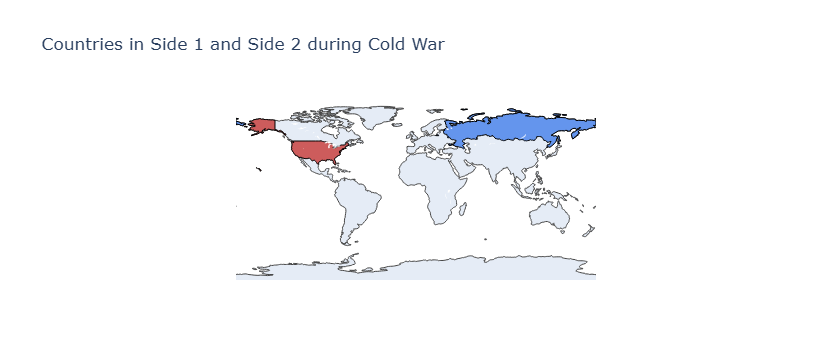

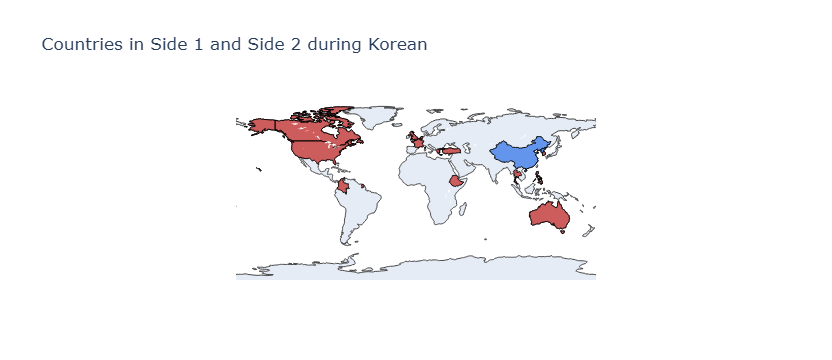

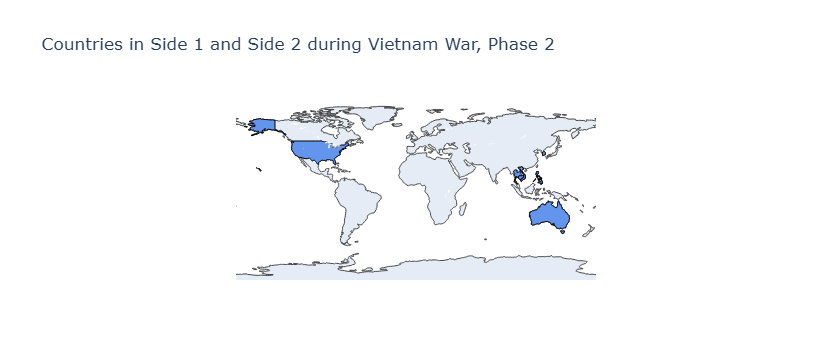

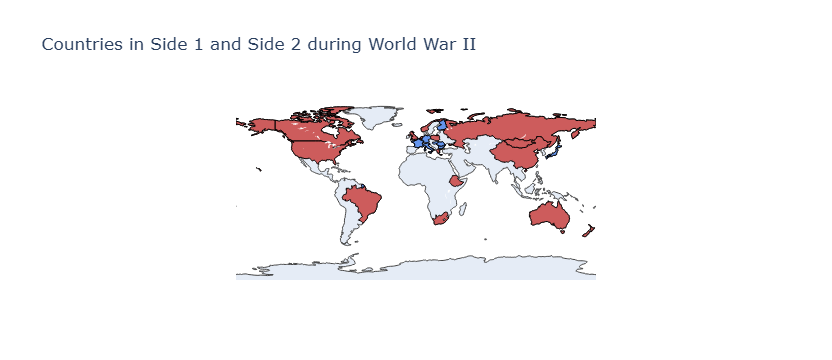

In [7]:
war_names_r = ["Cold War", "Korean", "Vietnam War, Phase 2", "World War II"]
for war in war_names_r:
    side_1, side_2 = find_sides(wars[wars.index==war])
    plot_countries(side_1, side_2, war)

## Analysis I

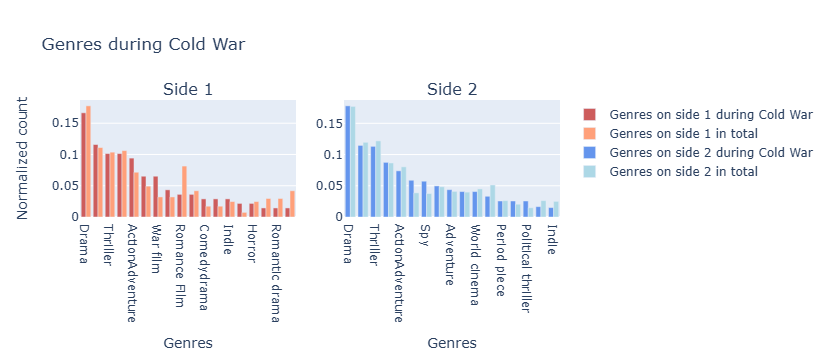

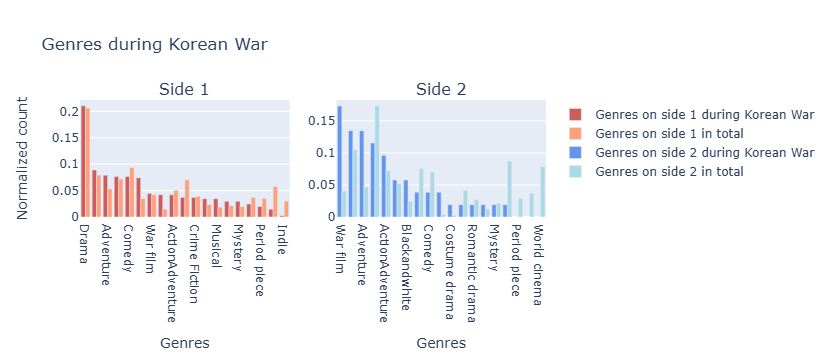

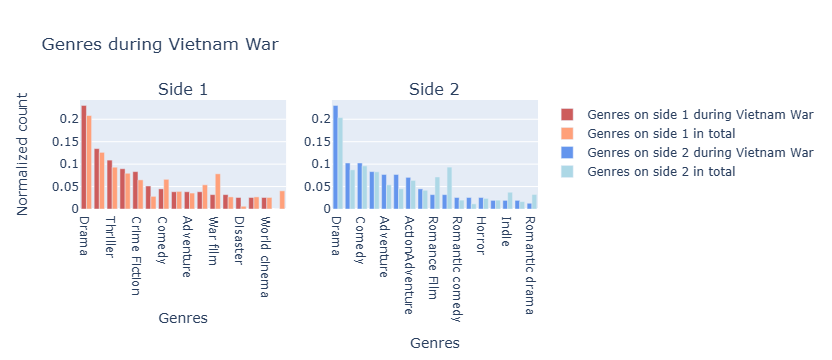

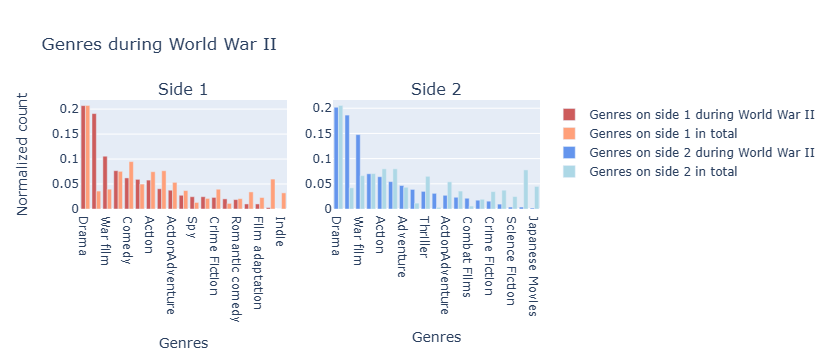

In [8]:
war_names_r = ["Cold War", "Korean", "Vietnam War, Phase 2", "World War II"]
for war in war_names_r:
    plot_genres_year_side(*get_genres_year_side(wars, movies, war, mode="summary"))
    # plot_genres_year_side(*get_genres_year_side(wars, movies, war, mode="country"))

## Analysis II

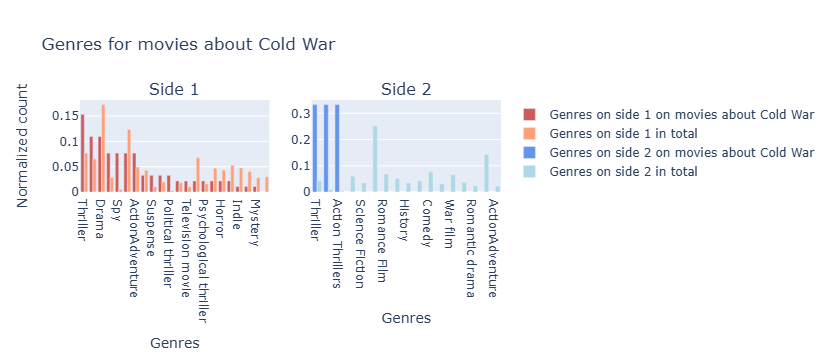

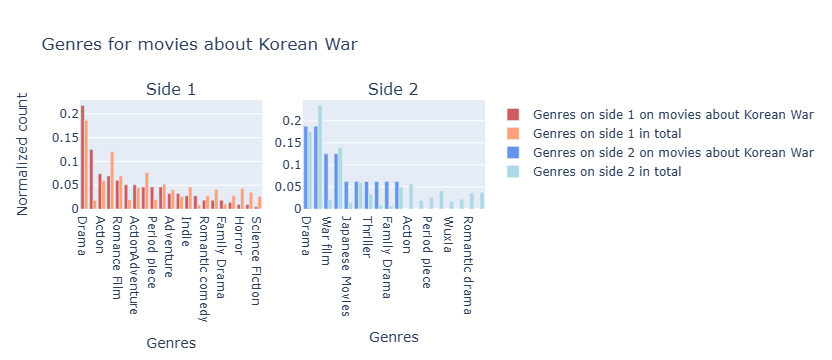

Not Enough Data


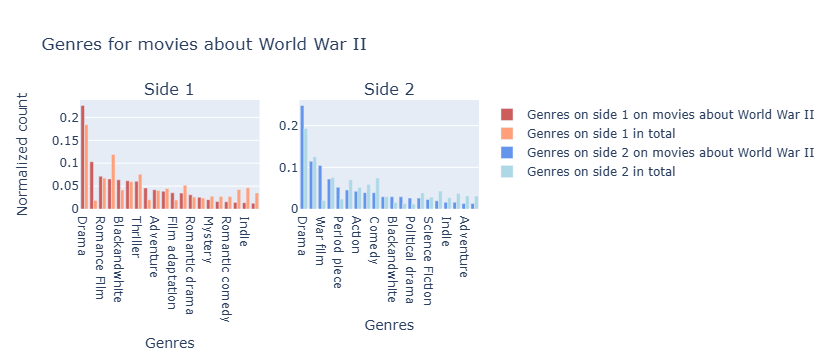

In [9]:
war_names_r = ["Cold War", "Korean", "Vietnam War, Phase 2", "World War II"]
for war in war_names_r:
    plot_genres_summary_side(*get_genres_summary_side(wars, movies, war, mode="country"))
    # plot_genres_summary_side(*get_genres_summary_side(wars, movies, war, mode="summary"))

## Analysis III

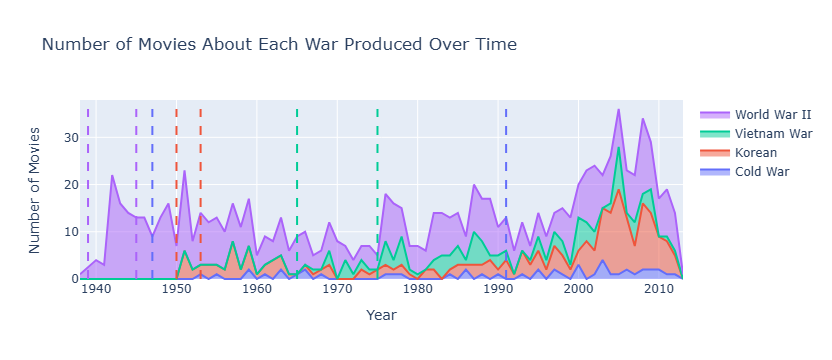

In [10]:
plot_movies_timeline(wars, movies, war_names_r, True)

## Analysis IV

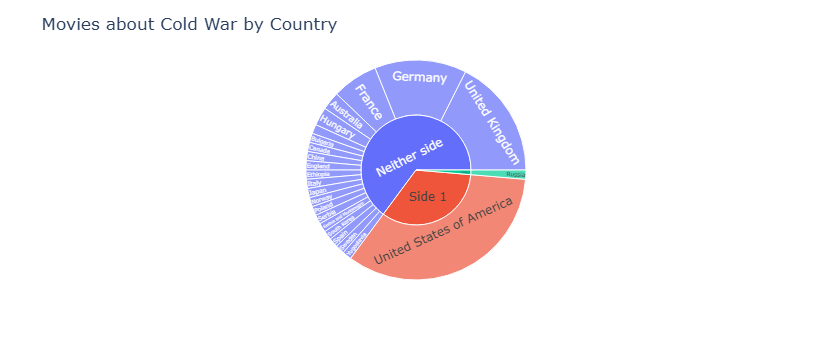

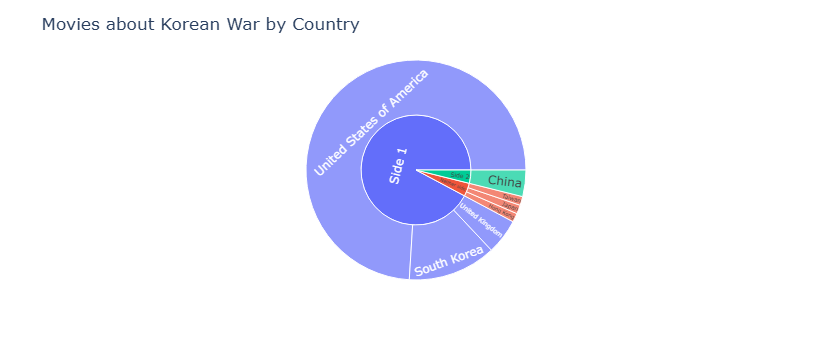

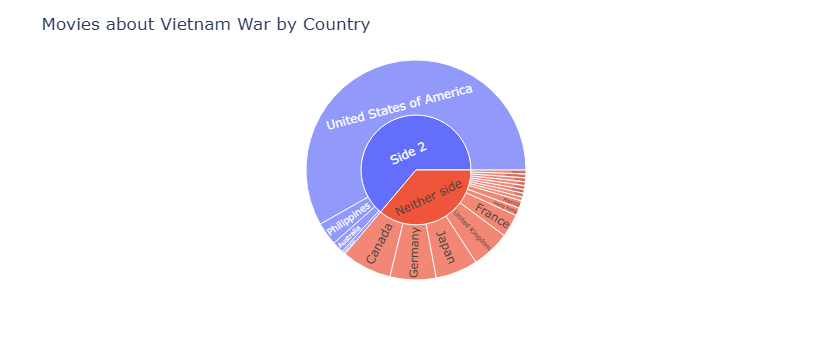

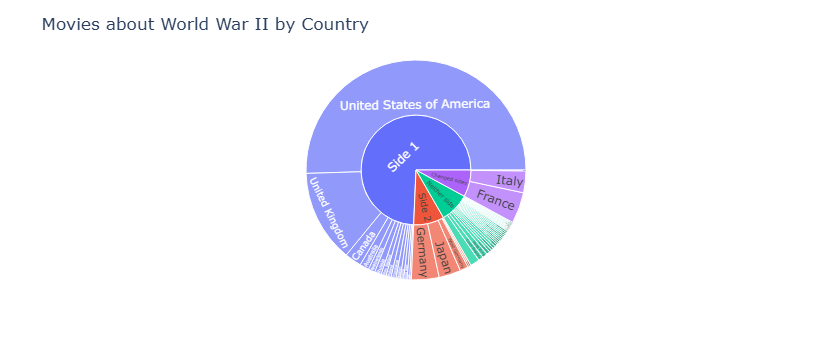

In [11]:
for war in war_names_r:
    plot_country_piechart(wars, movies, war)